### Zadanie 1

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cProfile
sns.set()

In [26]:
def exp_minus_func(x):
    return np.exp(-x)

def z1(x):
    return (6-2*x)/(6+4*x+x**2)

def z2(x):
    return (6-4*x+x**2)/(6+2*x)

### Wykres przybliżeń Padégo na jednym wykresie

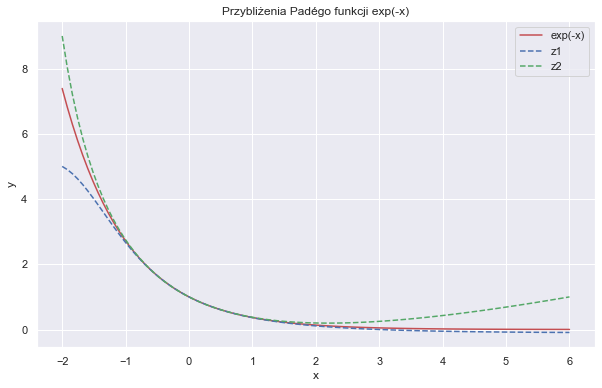

In [49]:
x = np.linspace(-2, 6 , 100)

plt.figure(figsize=(10, 6))
plt.plot(x, exp_minus_func(x), label='exp(-x)',color ='r', linewidth=1.5)
plt.plot(x, z1(x), label='z1', linestyle='--', color ='b',linewidth=1.5)
plt.plot(x, z2(x), label='z2', linestyle='--', color ='g', linewidth=1.5)
plt.title('Przybliżenia Padégo funkcji exp(-x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
#save to png
plt.savefig('pade_approximations.png')

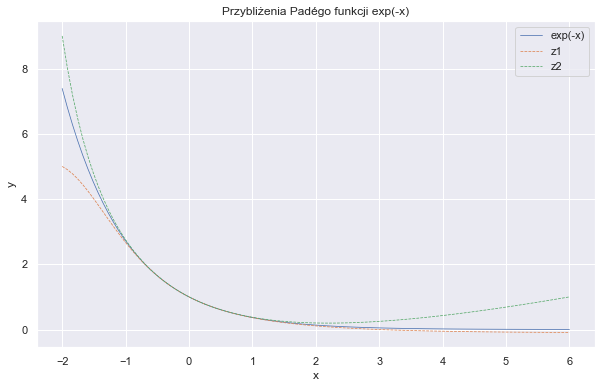

In [50]:
x = np.linspace(-2, 6 , 100)

plt.figure(figsize=(10, 6))
plt.plot(x, exp_minus_func(x), label='exp(-x)', linewidth=0.75)
plt.plot(x, z1(x), label='z1', linestyle='--', linewidth=0.75)
plt.plot(x, z2(x), label='z2', linestyle='--',  linewidth=0.75)
plt.title('Przybliżenia Padégo funkcji exp(-x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
#save to png
plt.savefig('pade_approximations1.png')

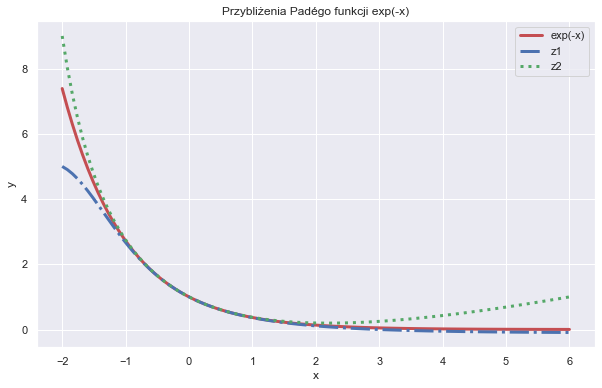

In [29]:
x = np.linspace(-2, 6, 100)

plt.figure(figsize=(10, 6))
plt.plot(x, exp_minus_func(x), label='exp(-x)',color ='r', linewidth=3)
plt.plot(x, z1(x), label='z1', linestyle='-.', color ='b',linewidth=3)
plt.plot(x, z2(x), label='z2', linestyle=':', color ='g', linewidth=3)
plt.title('Przybliżenia Padégo funkcji exp(-x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
#save to png
plt.savefig('pade_approximations2.png')

### Przybliżenia Padégo na oddzielnych rysunkach w trybie wielowykresowym

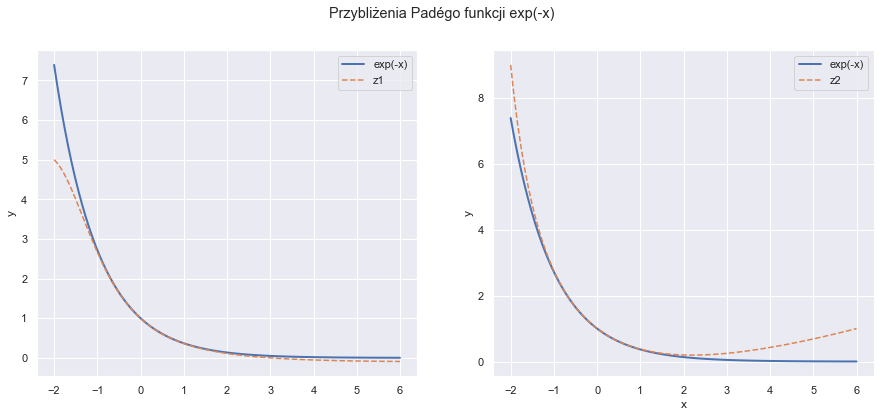

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 6))
fig.suptitle('Przybliżenia Padégo funkcji exp(-x)')

ax1.plot(x, exp_minus_func(x), label='exp(-x)', linewidth=2)
ax1.plot(x, z1(x), label='z1', linestyle='--')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True)

ax2.plot(x, exp_minus_func(x), label='exp(-x)', linewidth=2)
ax2.plot(x, z2(x), label='z2', linestyle='--')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True)

#save to PDF
plt.savefig('pade_approximation_z1.pdf')
plt.savefig('pade_approximation_z2.pdf')

### Błędy przybliżeń

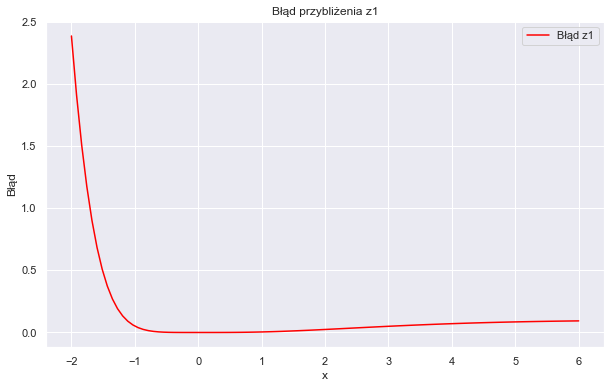

In [31]:
error_z1 = np.abs(exp_minus_func(x) - z1(x))
error_z2 = np.abs(exp_minus_func(x) - z2(x))

plt.figure(figsize=(10, 6))
plt.plot(x, error_z1, label='Błąd z1', color='red')
plt.title('Błąd przybliżenia z1')
plt.xlabel('x')
plt.ylabel('Błąd')
plt.legend()
plt.grid(True)

plt.savefig('error_z1.png')

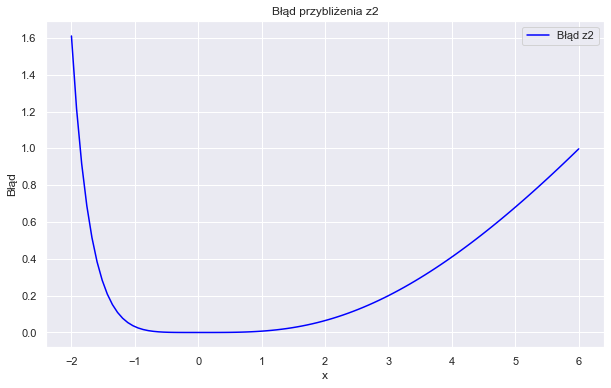

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(x, error_z2, label='Błąd z2', color='blue')
plt.title('Błąd przybliżenia z2')
plt.xlabel('x')
plt.ylabel('Błąd')
plt.legend()
plt.grid(True)

plt.savefig('error_z2.png')
plt.show()

Na podstawie wykresów możemy stwierdzić, że lepszym przybliżeniem Padégo funkcji $\exp(-x)$ jest funkcja $z_1$

### Zadanie 2

Program sprawdza warunek $1.0 + \epsilon > 1.0$. Gdy ten warunek nie jest spełniony, oznacza to, że $\epsilon$ jest tak mały, że nie wpływa już na wyniki operacji arytmetycznych.

In [33]:
def epsilon():
    epsilon = 1.0

    while 1.0 + epsilon > 1.0:
        epsilon /= 2.0
    return epsilon*2

machine_epsilon = epsilon()

Dokładność maszynowa na tym komputerze wynosi około:

In [34]:
machine_epsilon

2.220446049250313e-16

### Zadanie 3

In [35]:
x= (7/100)*100-7

Spodziewamy się,że otrzymany wynik będzie równy zero, jednak wynik może być inny z powodu błędów reprezentacji liczb zmiennoprzecinkowych.

In [36]:
x

8.881784197001252e-16

In [37]:
def error(x):
    result = (x/100)*100 - x
    return result

def num_with_errors():
    error_num = []
    for i in range(1, 51):
        if error(i) != 0:
            error_num.append(i)
    return error_num

error_num = num_with_errors()

Liczby podatne na błąd:

In [38]:
error_num

[7, 14, 28, 29]

### Zadanie 4

In [39]:
def IEEE_754():
    sign = 0
    exponent = int('01111111', 2)
    fraction = int('10110011001100110011001', 2) / 2**23

    value = (-1)**sign * 2**(exponent - 127) * (1 + fraction)

    true_value = 1.7

    absolute_error = abs(true_value - value)
    relative_error = absolute_error / true_value

    return {"value_from_ieee754": value,"absolute_error": absolute_error,"relative_error": relative_error}

results = IEEE_754()

Podstajemy odpowiednio wartość z reprezentacji IEEE 754, błąd bezwzględny oraz błąd względny

In [40]:
results

{'value_from_ieee754': 1.6999999284744263,
 'absolute_error': 7.152557368605983e-08,
 'relative_error': 4.2073866874152845e-08}

### Zadanie 5

In [41]:
def polynomial(x):
    return 6*x**4 + 5*x**3 - 13*x**2 + x + 1

In [42]:
def values():
    x_values = np.arange(-10, 10.0001, 0.0001)
    y_values = [polynomial(x) for x in x_values]
    return y_values

In [43]:
values()

[53691.0,
 53688.776134369764,
 53686.552337478126,
 53684.32860932367,
 53682.10494990498,
 53679.88135922066,
 53677.65783726927,
 53675.43438404943,
 53673.21099955972,
 53670.98768379873,
 53668.76443676506,
 53666.54125845728,
 53664.318148874,
 53662.0951080138,
 53659.87213587525,
 53657.649232456984,
 53655.42639775757,
 53653.203631775585,
 53650.980934509644,
 53648.75830595832,
 53646.5357461202,
 53644.31325499388,
 53642.09083257798,
 53639.868478871045,
 53637.64619387168,
 53635.42397757849,
 53633.20182999005,
 53630.979751104955,
 53628.75774092179,
 53626.53579943916,
 53624.31392665564,
 53622.092122569826,
 53619.870387180315,
 53617.64872048568,
 53615.427122484536,
 53613.20559317546,
 53610.98413255703,
 53608.76274062786,
 53606.54141738653,
 53604.32016283163,
 53602.098976961744,
 53599.877859775464,
 53597.65681127141,
 53595.43583144813,
 53593.214920304235,
 53590.99407783831,
 53588.77330404896,
 53586.55259893476,
 53584.33196249431,
 53582.11139472619,
 

In [44]:
cProfile.run("values()")

         200007 function calls in 0.365 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.363    0.363 1985465593.py:1(values)
        1    0.042    0.042    0.362    0.362 1985465593.py:3(<listcomp>)
   200001    0.320    0.000    0.320    0.000 3646201295.py:1(polynomial)
        1    0.002    0.002    0.365    0.365 <string>:1(<module>)
        1    0.000    0.000    0.365    0.365 {built-in method builtins.exec}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.arange}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




### Zadanie 6

In [45]:
def s_hornera(x):
    return x*(x*(x*(6*x+5)-13)+1)+1

In [46]:
def horner_values():
    x_values = np.arange(-10, 10.0001, 0.0001)
    y_values = [s_hornera(x) for x in x_values]
    return y_values

In [47]:
horner_values()

[53691.0,
 53688.776134369764,
 53686.55233747813,
 53684.328609323675,
 53682.104949904984,
 53679.88135922065,
 53677.65783726927,
 53675.434384049426,
 53673.21099955973,
 53670.98768379874,
 53668.764436765065,
 53666.541258457284,
 53664.318148873994,
 53662.09510801379,
 53659.87213587526,
 53657.64923245698,
 53655.426397757554,
 53653.20363177558,
 53650.980934509644,
 53648.75830595831,
 53646.5357461202,
 53644.31325499389,
 53642.090832577975,
 53639.86847887104,
 53637.64619387168,
 53635.42397757849,
 53633.20182999005,
 53630.979751104955,
 53628.757740921785,
 53626.53579943916,
 53624.313926655646,
 53622.09212256983,
 53619.870387180315,
 53617.64872048568,
 53615.427122484536,
 53613.20559317546,
 53610.98413255704,
 53608.76274062786,
 53606.54141738653,
 53604.320162831624,
 53602.098976961744,
 53599.87785977547,
 53597.6568112714,
 53595.43583144813,
 53593.21492030424,
 53590.99407783832,
 53588.77330404897,
 53586.552598934766,
 53584.33196249432,
 53582.1113947

In [48]:
cProfile.run("horner_values()")

         200007 function calls in 0.322 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.320    0.320 4103085456.py:1(horner_values)
        1    0.044    0.044    0.319    0.319 4103085456.py:3(<listcomp>)
   200001    0.275    0.000    0.275    0.000 421766450.py:1(s_hornera)
        1    0.002    0.002    0.322    0.322 <string>:1(<module>)
        1    0.000    0.000    0.322    0.322 {built-in method builtins.exec}
        1    0.001    0.001    0.001    0.001 {built-in method numpy.arange}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


